In [58]:
import requests
from IPython.core.display import HTML

# Line fitting the matrix way
This in-class exercise walks you through the following steps to fit a line to several datasets:
1. Create the datasets.
2. Construct design matrices.
3. Compute the weights using matrix inversion.
4. Plot the data and the fitted line.

## Linear (line) models

---
**Task 1 (easy): Identifying parameters👩‍💻**
1. Run the cell below to load the neccessary libraries and to construct the datasets.

2. Identify the inputs and the labels of each dataset. 



---

In [59]:
import numpy as np
import matplotlib.pyplot as plt

dataset = np.array([[10, 2], 
                      [9, 6]])
dataset_2 = np.array([[5, 1], [7, 5]])
dataset_3 = np.array([[4, 2], [5, 3]])
dataset_4 = np.array([[2,1],[5,2]])

#Input1 10,9,5,7,4,5
#output 2,6,1,5,2,3


---
**Task 2 (easy): Identifying parameters and constructing the design matrix👩‍💻**
1. Complete the `separate_inputs_labels`
 function below. The function should take a dataset as input and return the inputs and labels separated into separate variables. The function should return a matrix `X`
 containing the inputs and an array `y`
 containing the labels. Use the function to obtain the inputs and labels for each dataset.


**Hint**
Slicing might be helpful here.

2. Complete the code below and construct the design matrix for the other datasets. Print your results.


---

In [60]:
def separate_inputs_labels(dataset):
    
    X = dataset[:,0:1]
    y = dataset[:,1:] 
    #flatten y to 1D array
    y = y.flatten()

    return X, y

# construct the design matrix    
X1 = separate_inputs_labels(dataset)[0]
X2 = separate_inputs_labels(dataset_2)[0]
X3 = separate_inputs_labels(dataset_3)[0]
X4 = separate_inputs_labels(dataset_4)[0]

y1 = separate_inputs_labels(dataset)[1]
y2 = separate_inputs_labels(dataset_2)[1]
y3 = separate_inputs_labels(dataset_3)[1]
y4 = separate_inputs_labels(dataset_4)[1]

#X1 = 
# [[10]
# [ 9]
#X1_Design 
# [[10,1]
# [ 9,1]

X1_design = np.hstack((X1, np.ones(X1.shape)))
X4_design = np.hstack((X4, np.ones(X4.shape)))

# Print the datasets
print("X1 = \n",X1)
print("y1 =", y1)
print("Design Matrix for Dataset 1:\n", X1_design)
print("Design Matrix for Dataset 1:\n", X4_design)


X1 = 
 [[10]
 [ 9]]
y1 = [2 6]
Design Matrix for Dataset 1:
 [[10.  1.]
 [ 9.  1.]]
Design Matrix for Dataset 1:
 [[2. 1.]
 [5. 1.]]



---
**Task 3 (easy): Solve for model parameters👩‍💻**
1. Find the inverse of the design matrix for each dataset constructed above.
2. Calculate the model weights, then print your results.
3. Use the `plot_model`
 function to plot your results.
4. Visually inspect the plots and interpret the meaning and influence of each term.


---

Weights for Dataset 1: [0.33333333 0.33333333]


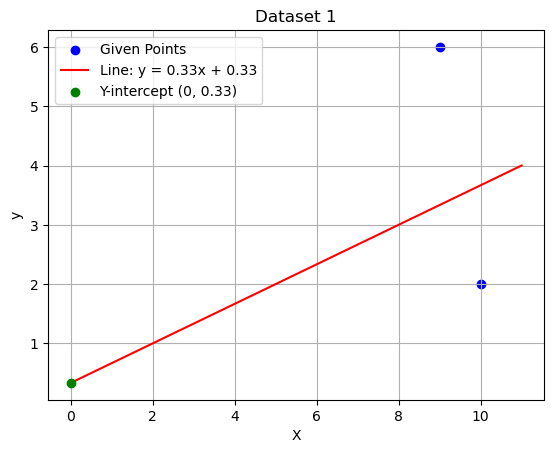

In [61]:
#A x = b
A = X4_design
b = y4
x_vals = np.linalg.inv(A)@b


print("Weights for Dataset 1:", x_vals)

# Function to plot data points and fitted line
def plot_model(X, y, wieghts, dataset_name):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    
    # Extend x_vals range to include zero for correct y-intercept visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = wieghts[0] * x_vals + wieghts[1]
    
    # Plot the fitted line
    plt.plot(x_vals, y_vals, color='red', label=f'Line: y = {wieghts[0]:.2f}x + {wieghts[1]:.2f}')
    
    # Plot the y-intercept
    plt.scatter(0, wieghts[1], color='green', zorder=5, label=f'Y-intercept (0, {wieghts[1]:.2f})')
    
    # Add title and labels
    plt.title(dataset_name)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    

plot_model(X1, y1, x_vals, 'Dataset 1')

If you have more time, complete the next task.

---
**Task 4 (easy): A new dataset👩‍💻♾️💡**
Run the cell below to define a new dataset.
1. Identify the inputs and the labels, then reuse the code from previous tasks to construct a design matrix.
2. Calculate the inverse of the design matrix. This step should result in an error. What are the possible reasons for getting this error?

**Note:** For pedagogical reasons, next week we will return to this dataset, as you will have the necessary tools to fit a model for this scenario.


---

In [62]:
dataset_5 = np.array([[9, 1], 
                      [7, 2],
                      [3, 8], 
                      [1, 3],
                      [4, 3]])

design_matrix = np.hstack((dataset_5[:,0:1], np.ones((dataset_5.shape[0], 1))))

#Fails, because det(a) = 0
#inv_design_matrix = np.linalg.inv(design_matrix)

print("design matrix for dataset 5:\n", design_matrix)


design matrix for dataset 5:
 [[9. 1.]
 [7. 1.]
 [3. 1.]
 [1. 1.]
 [4. 1.]]


# Grasple

In [63]:
dataset = np.array([[-4, 1], 
                      [-2, 5],
                      [2,-3],
                      [4,-5]])

x_vals = separate_inputs_labels(dataset)[0]
y_vals = separate_inputs_labels(dataset)[1]

A = np.hstack((np.ones(x_vals.shape),x_vals))
w = (np.linalg.inv(A.T@A)@A.T)@y_vals

print("Design Matrix for Dataset 1:\n", A)

print(w)

y_hat = A@w

print("y_hat", y_hat[0])

# Calculating the error for only first point
error = y_vals[0] - y_hat[0]

e = error
print("e", e)


Design Matrix for Dataset 1:
 [[ 1. -4.]
 [ 1. -2.]
 [ 1.  2.]
 [ 1.  4.]]
[-0.5 -1. ]
y_hat 3.5
e -2.5


## grasple 2
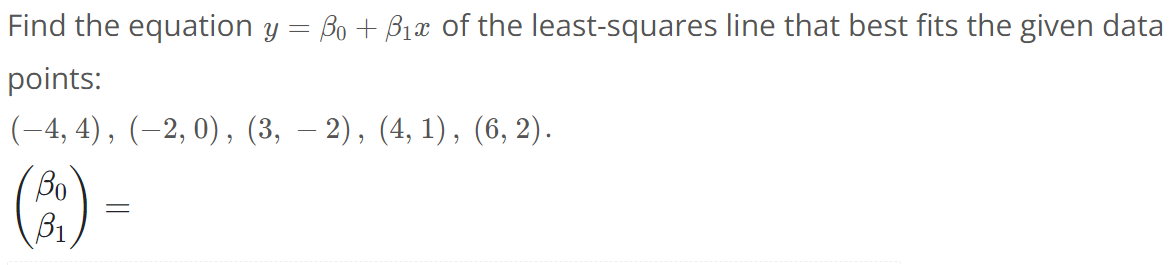


In [64]:
dataset = np.array([[-4, 4], 
                    [-2, 0],
                    [3,-2],
                    [4,1],
                    [6,2]])

x_vals = separate_inputs_labels(dataset)[0]
y_vals = separate_inputs_labels(dataset)[1]

A = np.hstack((np.ones(x_vals.shape),x_vals))

#closed formula for w, which represents our y-intercept and slope
w = (np.linalg.inv(A.T@A)@A.T)@y_vals

print("Design Matrix for Dataset 1:\n", A)

print("y-intercept and slope", w)

y_hat = A@w

print("y_hat (prediction)", y_hat)



Design Matrix for Dataset 1:
 [[ 1. -4.]
 [ 1. -2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  6.]]
y-intercept and slope [ 1.25561798 -0.18258427]
y_hat (prediction) [1.98595506 1.62078652 0.70786517 0.5252809  0.16011236]


## grasple 3
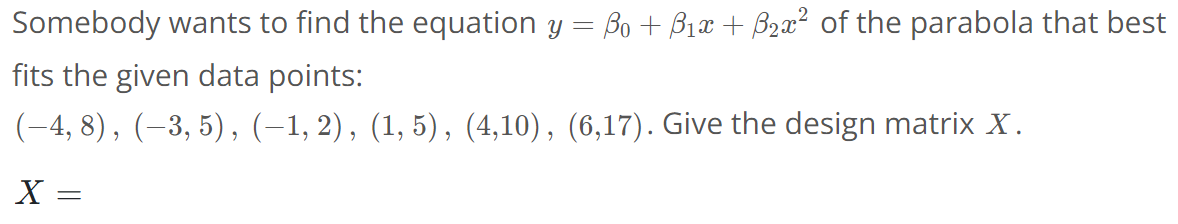

In [65]:
#Tricket er, at design matrix består af:
#1 taller hvor der er y-intercept,
#x værdierne
#x^2 værdierne


A = np.array([[1,-4,16], 
              [1,-3,9],
              [1,-1,1],
              [1,1,1],
              [1,4,16],
              [1,6,36]])

y_vals = np.array([8,5,2,5,10,17])

#closed formula for w, which represents our y-intercept and slope
w = (np.linalg.inv(A.T@A)@A.T)@y_vals

print("Design Matrix for Dataset 1:\n", A)

print("y-intercept and slope for x, slope for x^2", w)

y_hat = A@w

print("y_hat (prediction)", y_hat)



Design Matrix for Dataset 1:
 [[ 1 -4 16]
 [ 1 -3  9]
 [ 1 -1  1]
 [ 1  1  1]
 [ 1  4 16]
 [ 1  6 36]]
y-intercept and slope for x, slope for x^2 [3.24250581 0.31151352 0.33684082]
y_hat (prediction) [ 7.38590481  5.33953261  3.26783311  3.89086015  9.87801297 17.23785636]


## Grasple 4 
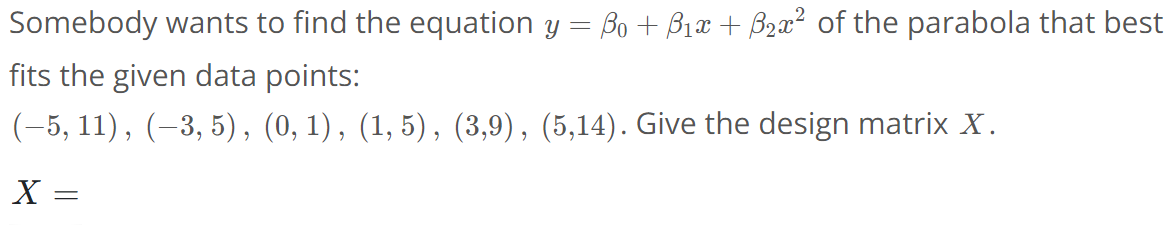

In [66]:
#Tricket er, at design matrix består af:
#1 taller hvor der er y-intercept,
#x værdierne
#x^2 værdierne


A = np.array([[1,-5,25], 
              [1,-3,9],
              [1,0,0],
              [1,1,1],
              [1,3,9],
              [1,5,25]])


print("design matrix:" , A)


design matrix: [[ 1 -5 25]
 [ 1 -3  9]
 [ 1  0  0]
 [ 1  1  1]
 [ 1  3  9]
 [ 1  5 25]]


# Grasple 4 - Basis and projections
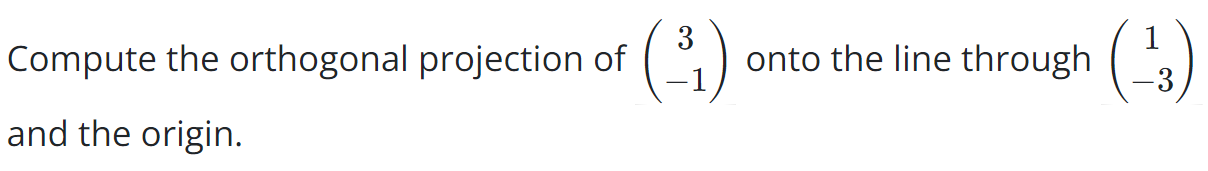

In [68]:
##1

#The line l written as the design matrix
A = np.array([[1, -3]]).T  #  has to be a column vector

X= np.array([[3,-1]]).T

##2
## construct projection matrix
P = (A @ np.linalg.inv(A.T @ A)) @ A.T
print("P:\n", P)

#projection the points with matrix multiplication
x_prime = P @ X
print("projected points:\n", x_prime)

P:
 [[ 0.1 -0.3]
 [-0.3  0.9]]
projected points:
 [[ 0.6]
 [-1.8]]
